<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/28_0_TM%ED%86%B5%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# nltk
# copus(말뭉치)와 copura(말뭉치의 복)

In [ ]:
import nltk
nltk.download('punkt')  # 문장을 토큰화하는 패키지
para = "Hello everyone"
from nltk.tokenize import sent_tokenize
sent_tokenize(para)  # 문장 단위

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Hello everyone']

In [ ]:
para_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 이제 텍스트 마이닝 클래스를 시작해봅시다!"
sent_tokenize(para_kor)

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 텍스트 마이닝 클래스를 시작해봅시다!']

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(para)  # 단어

['Hello', 'everyone']

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize("Can't is a contraction."))

['Can', "'", 't', 'is', 'a', 'contraction', '.']


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")  # 문자
tokenizer.tokenize("Can't is a contraction.")

["Can't", 'is', 'a', 'contraction']

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords  # 불용어
english_stops = set(stopwords.words('english'))
words = ["Can't", "is", "a", "contraction"]
[word for word in words if word not in english_stops]  # 불용어를 제외함

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


["Can't", 'contraction']

In [ ]:
my_stops = ['contraction', 'is']  # 커스터마이즈화된 불용어
[word for word in words if word not in my_stops]  # 커스텀 불용어를 제외한 단어들로 구성된 리스트 생성 (커스텀 불용어 아닌 단어만 출력)

["Can't", 'a']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk  # 단어 토큰화 / 품사 태깅 / 개체명 인식기능
sentence = "James is working at Disney in London"
sentence = pos_tag(word_tokenize(sentence))  # 문장을 단어 단위로 토큰화 이후 각 단어의 품사를 태깅 : sentence는 (단어, 품사) 튜플형태 
print(sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [ ]:
# corpora : 말뭉치
# 단어장을 이용하여, 문서로부터 추출
from gensim.corpora import Dictionary
texts = [['human', 'interface', 'computer']]  # 3개의 객체 (단일문서에 포함)
dct = Dictionary(texts)  # 사전 객체 (딕셔너리)
dct.add_documents([['cat', 'say', 'meow'], ['dog']])  # ['cat', 'say', 'meow'], ['dog']라는 두개의 문서가 단어사전의 추가 / 7개의 단어가 들어있음
# bag of word : text frequency
dct.doc2bow(['dog', 'computer', 'non_existent_word'])  # 단어들의 빈도수를 계산

[(0, 1), (6, 1)]

In [ ]:
# 사전에는, 도메인에 중요한 단어들만 존재한다.
# 사전은 도메인에서 자동으로 생성할 수 있고,
# 사전에 추가로 데이터를 입력할 수 있도록
# 사전에 있는 token과 id는 1:1로 매핑하기에, 정방향이나 역방향으로 데이터를 확인할 수 있다.

In [ ]:
import pprint  # 보기좋게 출력하기 위한 pprint
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]  # 처리할 텍스트 코퍼스 / 9개의 문서

In [ ]:
stoplist = set('for a of the and to in'.split(' '))  # 불용어 목록 정의 ('for', 'a', 'of', 'the', 'and', 'to', 'in')을 불용어로 지정
# 'Human mechine interface for lab abc computer applications"
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]  # 텍스트 코퍼스 전처리 (각 문서를 소문자로 바꾸고 단어 단위로 토큰화, 불용어 제외한 단어들로 구성된 리스트 생성)
# 'Human mechine interface lab abc computer applications"
from collections import defaultdict
frequency = defaultdict(int)  # 키 데이터 : 숫자 / frequency 딕셔너리 : 단어 빈도수를 저장
# 숫자를 카운트하여, 1개는 제거하기 위함.
for text in texts:  # 'Human mechine interface lab abc computer applications"
  for token in text:  # Human
    frequency[token] += 1  # texts에 있는 문서 순회하며, 각 문서의 단어들 빈도수를 계선

processed_corpus = [[token for token in text if frequency[token] > 1]
                    for text in texts]  # 전처리된 코퍼스 생성 / 각 문서에서 빈도수가 1보다 큰 단어들로 구성된 리스트
pprint.pprint(processed_corpus)

from gensim import corpora  # corpora : 단어 사전을 생성, 관리하는 기능
dictionary = corpora.Dictionary(processed_corpus)  # 전처리된 코퍼스 기반 단어사전 구
print(dictionary)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]
Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...>


In [ ]:
pprint.pprint(dictionary.token2id)  # 원하는 단어들의 번호(ID)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [ ]:
token_dict = dictionary.token2id
pprint.pprint(token_dict)
token_dict['computer']  # 딕셔너리에서 computer라는 단어의 ID 확인 

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


0

In [ ]:
pprint.pprint(dictionary.id2token)   # 단어 ID와 해당 단어를 출력
dictionary[10]  # ID 10 에 해당하는 단어를 확인

{0: 'computer',
 1: 'human',
 2: 'interface',
 3: 'response',
 4: 'survey',
 5: 'system',
 6: 'time',
 7: 'user',
 8: 'eps',
 9: 'trees',
 10: 'graph',
 11: 'minors'}


'graph'

In [ ]:
# 정렬순으로 찾아줌
new_doc = "Human computer interaction"  # 새로운 문서
print(new_doc.lower().split())  # 새로운 문서를 소문자로 변환하고 단어 단위로 토큰화하여 출력 (공백 기준으로 단어 분리)
new_vec = dictionary.doc2bow(new_doc.lower().split())  # doc2new() : 새 문서를 단어사전에 기반하여 Bag-of-words 형식으로 바꿈
                                                       # 소문자로 바꾸고 토큰화한 단어들을 단어사전 기반, 단어 ID와 단어 빈도수로 표현
print(new_vec)  # 단어장에 없는 것은 제외

['human', 'computer', 'interaction']
[(0, 1), (1, 1)]


In [ ]:
dictionary[0], dictionary[1]

('computer', 'human')

In [ ]:
# processed_corpus : 토큰이 한개 이상인 문서
# 문서를 사전에 들어있는 단어의 개수로 변경.
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]  # 각 문서를 단어 ID와 해당 단어 빈도수로 표현된 튜플 리스트
pprint.pprint(bow_corpus)  # Bag-of-Words 형식으로 변환된 corpus를 보기좋게 출력

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]


In [ ]:
# text frequency and inverse document frequency로 구성. (tfidf)
# idf = 총문서수 / 단어가 들어있는 문서 수
# 단어가 들어있는 문서수가 작으면, 중요한 단어로 취급된다.
from gensim import models  # tfidf 모델 생성
tfidf = models.TfidfModel(bow_corpus)  # tfidf 모델은 단어의 빈도수와 역문서 빈도수 기반으로 단어 중요도 계산

In [ ]:
dictionary[0], dictionary[1]  # ('computer', 'human') 으로 구성된 문서

('computer', 'human')

In [ ]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # [(0, 0.7071067811865476), (1, 0.7071067811865476)] 0번, 1번 ID의 단어 가중치가 0.7071

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [ ]:
corpus_tfidf = tfidf[bow_corpus]  # 전체 코퍼스의 tfidf 가중치 계산
for doc in corpus_tfidf:
  print(doc)

[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(0, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.44424552527467476), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.3244870206138555)]
[(2, 0.5710059809418182), (5, 0.4170757362022777), (7, 0.4170757362022777), (8, 0.5710059809418182)]
[(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(4, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


In [ ]:
# LSI 모델 : 문서의 잠재적 의미를 추출
# Topic Analysis model : LSI(latent semantic indexing)
# Truncated SVD (singula value decomposition, 특이 행렬 분해)
# 특이치 중 2개를 취함
lsi_model = models.LsiModel(corpus_tfidf, id2word = dictionary, num_topics = 2)  # 단어 사전 지정 / 추출할 잠재 의미 개수
corpus_lsi = lsi_model[corpus_tfidf]  # 문서가 Topic에 가까운 정도가 정의되어 있음.
                                      # LSI 모델로 전체 코퍼스의 잠재 의미 벡터를 계산

In [ ]:
lsi_model.print_topics(2)  # 2개의 주제에 대한 정보를 출력 / 출력결과 : 각 주제번호, 해당 주제애 대한 단어, 가중치

[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '-0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"time" + -0.320*"response" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"')]

In [ ]:
for doc, as_text in zip(corpus_lsi, text_corpus):  # 토픽과의 관계 확인
  print(doc, as_text)  # 앞단 5개는 1번 데이터에 가까운 단어 / 뒷단 4개는 0번 데이터에 가까운 단어 (가중치? 확률?)

[(0, 0.06600783396090384), (1, -0.5200703306361849)] Human machine interface for lab abc computer applications
[(0, 0.19667592859142546), (1, -0.7609563167700047)] A survey of user opinion of computer system response time
[(0, 0.0899263997244645), (1, -0.7241860626752511)] The EPS user interface management system
[(0, 0.07585847652178196), (1, -0.6320551586003428)] System and human system engineering testing of EPS
[(0, 0.10150299184980154), (1, -0.5737308483002955)] Relation of user perceived response time to error measurement
[(0, 0.7032108939378312), (1, 0.1611518021402583)] The generation of random binary unordered trees
[(0, 0.8774787673119832), (1, 0.16758906864659456)] The intersection graph of paths in trees
[(0, 0.9098624686818577), (1, 0.14086553628719048)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.6165825350569281), (1, -0.053929075663893565)] Graph minors A survey


In [ ]:
import os
import tempfile

with tempfile.NamedTemporaryFile(prefix = 'model-',
                                 suffix = '.lsi', delete = False) as tmp:  # 임시파일 생성
# prefix : 임시 파일명에 접두사 지정 / sufftx : 임시파일 확장자 지정
    lsi_model.save(tmp.name)  # LSI 모델을 지정된 임시 파일 경로(tmp.name)에 저장

In [ ]:
loaded_lsi_model = models.LsiModel.load(tmp.name)  # 저장된 lsi 모델 로드
os.unlink(tmp.name)  # 임시파일 삭제

In [ ]:
# 다시 모델을 생성
lsi = models.LsiModel(corpus_tfidf, id2word = dictionary, num_topics = 2)
doc = "Human computer interaction"  # 새로운 문서
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
print(vec_lsi)  # 어떠 토픽(topic)에 가까운지를 확인

[(0, 0.07910475117444968), (1, 0.5732835243079404)]


In [ ]:
from gensim import similarities  # 유사도
# 유사도 인덱스
index = similarities.MatrixSimilarity(lsi[corpus_tfidf])  # 전체 데이터
print(index)  # 9 docs, 새로 들어온 문서가 비슷한 문서의 인덱스이다.

MatrixSimilarity<9 docs, 2 features>


In [ ]:
index.save('/deerwester.index')  # 인덱스 저장 (9개의 문서에 대한 유사도 인덱스)
index = similarities.MatrixSimilarity.load('/deerwester.index')

In [ ]:
sims = index[vec_lsi]  # 인덱스에 새로 들어온 문서를 입력한다.
print(list(enumerate(sims)))  # 새로 들어온 문서, 기본적으로 학습이 된 9개의 문서와의 유사도

[(0, 0.9999408), (1, 0.99330217), (2, 0.99990785), (3, 0.99984384), (4, 0.9992786), (5, -0.08804217), (6, -0.0515742), (7, -0.016480923), (8, 0.2224844)]


In [ ]:
# 새로 들어온 문서와 다른 문서와의 관련성 확인
# 주제면에서 어떠한 문서와 유사한지 확인
# 각 문서와 얼마나 유사한지 확인할 수 있음.
sims = sorted(enumerate(sims), key = lambda item: item[1])  # 역순으로 정렬
for i, s in enumerate(sims):
  print(s, text_corpus[i])
# 새로 입력된 문서는, 0번 토픽과 가깝고 각각의 학습 데이터와의 유사도(ex. 0.9999408)

(0, (0, 0.9999408)) Human machine interface for lab abc computer applications
(4, (1, 0.99330217)) A survey of user opinion of computer system response time
(1, (2, 0.99990785)) The EPS user interface management system
(2, (3, 0.99984384)) System and human system engineering testing of EPS
(3, (4, 0.9992786)) Relation of user perceived response time to error measurement
(8, (5, -0.08804217)) The generation of random binary unordered trees
(7, (6, -0.0515742)) The intersection graph of paths in trees
(6, (7, -0.016480923)) Graph minors IV Widths of trees and well quasi ordering
(5, (8, 0.2224844)) Graph minors A survey


# nltk의 movie_review 데이터를 이용하여, 데이터를 word2vec으로 처리한 다음 벡터간 유사단어를 찾는 과정

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
from nltk.corpus import movie_reviews  # 영화 리뷰 데이터셋 (긍정 / 부정)
print(movie_reviews.words())  # movie_review 코퍼스에서 모든 단어를 추출하여 출력 (리스트 형태)
movie_reviews.sents()  # 모든 문장을 추출

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

In [ ]:
sentences = [list(s) for s in movie_reviews.sents()]  # 각 문장을 리스트로 변환하여 sentences 리스트에 저장
print("0번 문장: ", sentences[0])  # 첫번째 문장을 추출
print("1번 문장: ", sentences[1])  # 두번째 문장을 추출

0번 문장:  ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
1번 문장:  ['they', 'get', 'into', 'an', 'accident', '.']


In [ ]:
# Word2Vec 모델 사용하여, 단어간 유사도를 측정하고 유사한 단어(가장 가까운 단어)를 찾고 저장
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences)  # 단어를 벡터화하고 벡터화된 단어 사이의 유사도를 계산
model_name = 'test1'  # 모델 저장할 파일명
model.save(model_name)  # 모델 저장

In [ ]:
print(model.wv.similarity('actor', 'actress'))  # 'actor'와 'actress; 두 단어의 유사도를 출력
print(model.wv.similarity('actor', 'she'))  # 'actor'와 'she' 두 단어의 유사도를 출력
print(model.wv.most_similar('accident'))  # accident와 가장 가까운 단어 (유사한 단어)

0.8793993
0.21711895
[('automobile', 0.8624621033668518), ('bus', 0.8388554453849792), ('building', 0.830528736114502), ('prison', 0.8247536420822144), ('plane', 0.8231124877929688), ('evening', 0.8223156332969666), ('shower', 0.8123038411140442), ('abandoned', 0.8111004829406738), ('breaks', 0.8101474642753601), ('desert', 0.8070482611656189)]


In [ ]:
model.wv.doesnt_match('man woman child kitchen'.split())  # 주어진 단어 중 성격이 다른 단어

'kitchen'

In [ ]:
model.wv.most_similar("man")  # man과 가장 유사한 단어와 가중치를 출력

[('woman', 0.899890661239624),
 ('boy', 0.8139399290084839),
 ('girl', 0.8106905817985535),
 ('killer', 0.7911477088928223),
 ('child', 0.7363808155059814),
 ('doctor', 0.7305992245674133),
 ('guy', 0.7107526063919067),
 ('person', 0.6904386281967163),
 ('father', 0.6680009961128235),
 ('cop', 0.6673140525817871)]

In [ ]:
print(model.wv.most_similar(positive=['actor', 'she'], negative = 'actress',  # 'actor', 'she'는 양성(P) 단어, 'actress'는 부정 단어
                            topn = 3))  # 가장 유사한 상위 3개의 단어만 출력

[('he', 0.809712827205658), ('everyone', 0.7295356392860413), ('him', 0.6280834078788757)]


In [ ]:
# 군집을 시각화하는 데에 특화된 모델 : TSNE
from sklearn.manifold import TSNE  # 가까운 것은 더 가깝게, 먼 것은 더 멀게.
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False  # 그래프에서 '-' 기호를 표시
vocab = model.wv.key_to_index.keys()  # Word2Vec 모델의 단어 집합(Vocabulary)에 있는 모든 단어 가져오기 
X = []
for word in vocab:
  X.append(model.wv.get_index(word))  # 각 단어에 대한 벡터
X = model.wv[vocab]  # 모든 단어에 대한 벡터를 'X'에 할당
print(len(X))  # X의 길이(벡터의 개수) 출력
print(X[0][:10])  # 첫번째 단어의 벡터의 처음 10개값 출력
tsne = TSNE(n_components = 2)  # tsne 초기화, 2차원으로 임베팅
X_tsne = tsne.fit_transform(X[:100, :])  # X 벡터의 처음 100개만을 선택하여 tsne 적용, 2차원으로 임베딩

14794
[-0.10279123 -0.6206238   0.5692208   0.63532865 -0.49407476 -0.85606194
 -0.16172512  0.16969377 -0.58694905  0.36916253]


In [ ]:
import pandas as pd
# tsne 적용한 단어벡터인 X_tsne를 데이터프레임으로 변환
# 인덱스로 모델의 단어 집합 중 첫번째부터 100번째까지의 단어 사용, 열은 x, y로 지정
df = pd.DataFrame(X_tsne, index = list(model.wv.key_to_index.keys())[:100], columns = ['x', 'y'])
print(df.shape)
df.head(10)

(100, 2)


,x,y
",",-0.529852,0.111679
the,-1.787376,0.521718
.,-0.262652,0.159029
a,-1.525608,1.431757
and,-0.552627,0.399525
of,0.915650,-0.251048
to,-3.980181,2.913990
',1.211719,-3.583352
is,-0.757543,2.912203
in,2.416842,-0.674641


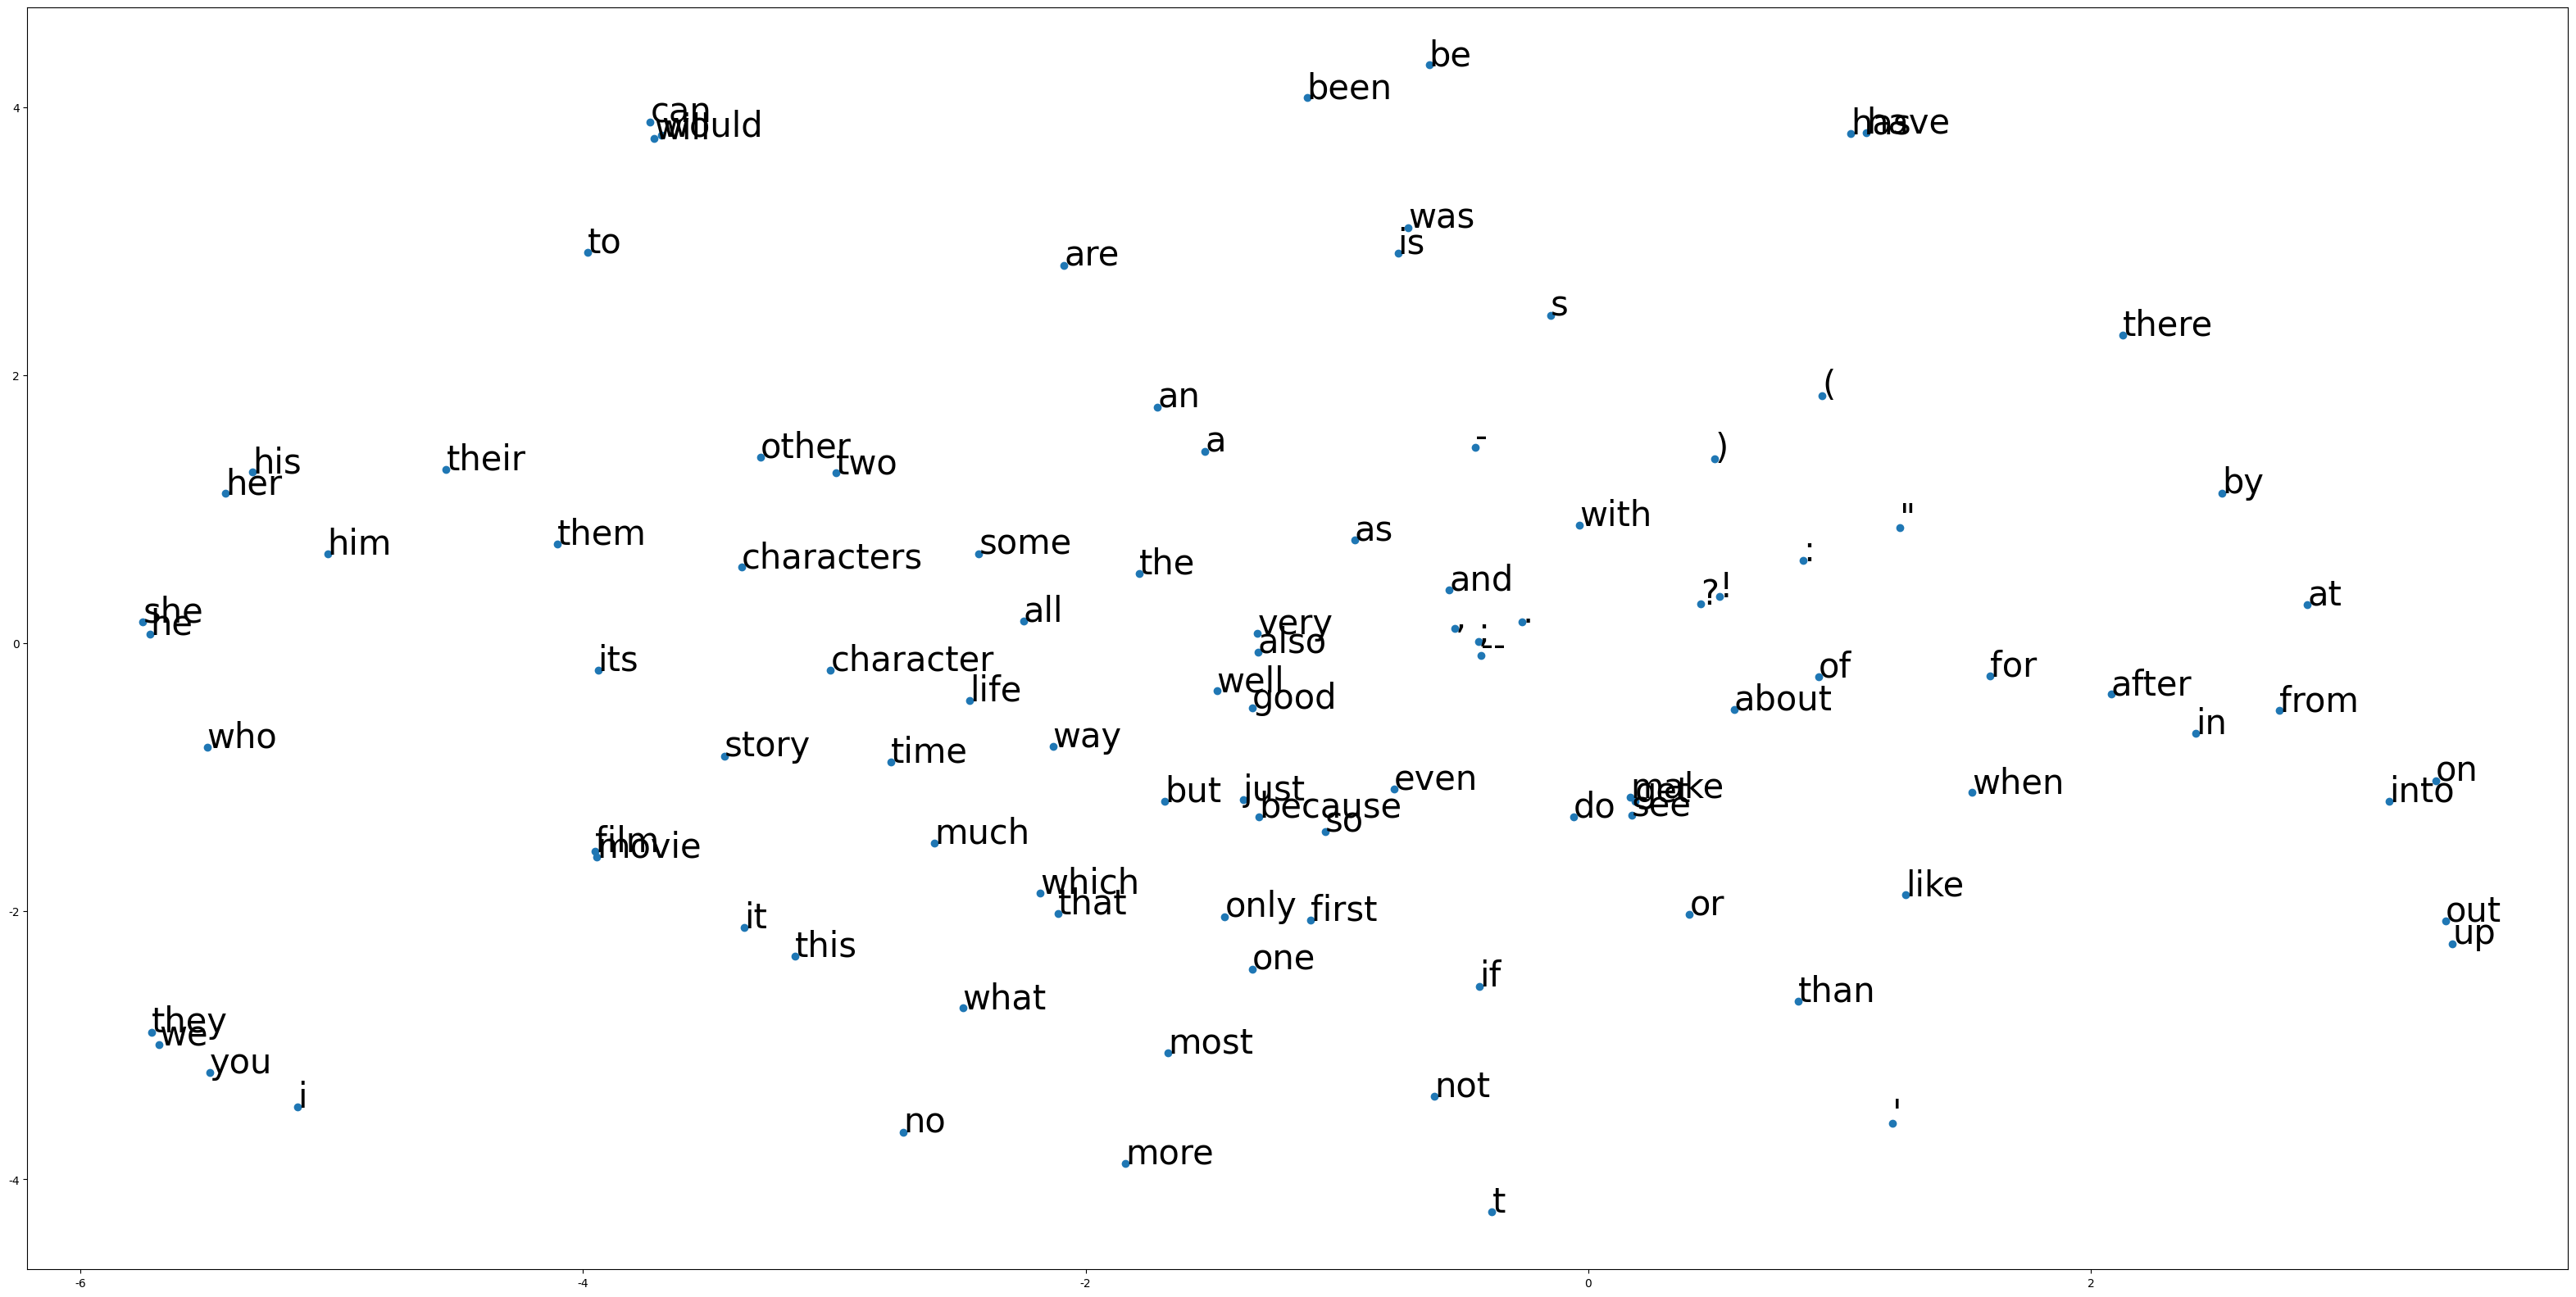

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20) 
ax = fig.add_subplot(1, 1, 1)  # 1행 1열의 서브플롯 한개 생성

ax.scatter(df['x'], df['y'])  # 산점도

for word, pos in df.iterrows():  # 단어와 해당 좌표값을 그래프상에 주석으로 표시
  ax.annotate(word, pos, fontsize = 30)
plt.show()

# Konlpy

In [ ]:
!pip install Pyro4
!pip install jpype1
!pip install konlpy
!pip install simplejson
!pip install pygame
!pip install wordcloud

In [ ]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__  # 0.6.0
# - nouns : 명사 추출
# - morphs : 형태소 추출
# - pos : 품사를 부착

'0.6.0'

In [ ]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u"네. 안녕하세요. 반갑습니다."))  # 문장을 문장단위로 분리

['네. 안녕하세요.', '반갑습니다.']


In [ ]:
kkma = Kkma()
pprint(kkma.nouns(u"아버지가 방에 들어가신다. 그 방에는 내 동생이 있다."))  # 명사를 추출

['아버지', '방', '내', '동생']


In [ ]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.analyze(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
print(hannanum.morphs(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
print(hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파'))
print(hannanum.pos(u'웃으면 더 행복합니다!'))

[[[('롯데마트', 'ncn'), ('의', 'jcm')], [('롯데마트의', 'ncn')], [('롯데마트', 'nqq'), ('의', 'jcm')], [('롯데마트의', 'nqq')]], [[('흑마늘', 'ncn')], [('흑마늘', 'nqq')]], [[('양념', 'ncn')]], [[('치킨', 'ncn'), ('이', 'jcc')], [('치킨', 'ncn'), ('이', 'jcs')], [('치킨', 'ncn'), ('이', 'ncn')]], [[('논란', 'ncpa'), ('이', 'jcc')], [('논란', 'ncpa'), ('이', 'jcs')], [('논란', 'ncpa'), ('이', 'ncn')]], [[('되', 'nbu'), ('고', 'jcj')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecc')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecs')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecx')], [('되', 'paa'), ('고', 'ecc')], [('되', 'paa'), ('고', 'ecs')], [('되', 'paa'), ('고', 'ecx')], [('되', 'pvg'), ('고', 'ecc')], [('되', 'pvg'), ('고', 'ecs')], [('되', 'pvg'), ('고', 'ecx')], [('되', 'px'), ('고', 'ecc')], [('되', 'px'), ('고', 'ecs')], [('되', 'px'), ('고', 'ecx')]], [[('있', 'paa'), ('다', 'ef')], [('있', 'px'), ('다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]]]
['롯데마트', '의', '흑마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다', '.']
['다람쥐', '쳇바퀴', '타고파']
[('웃', 'P'), ('으면', 'E'), 

In [ ]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))
print(okt.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
['항공기', '체계', '종합', '개발', '경험']


In [ ]:
# 원하는 품사만 취하기
voc = "브라이튼의 다음 도전 과제는 당연히 유로파리그에서 얼마나 좋은 성적을 낼 수 있느냐다."
okt_pos = Okt().pos(voc, norm = True, stem = True)
# 명사, 형용사, 동사를 각각 추출
okt_filtering = [x for x, y in okt_pos if y in ['Noun', 'Adjective', 'Verb']]
print(okt_filtering)
print(len(okt_filtering))
okt_len = pd.Series(okt_filtering)
okt_len = okt_len.apply(len)
df = pd.DataFrame({'word':okt_filtering, 'len':okt_len})
df[df['len'] > 1]  # 1자 이상만 추출

['브라이튼', '다음', '도전', '과제', '당연하다', '유로파리그', '얼마나', '좋다', '성적', '낼', '수', '있다', '늘다']
13


,word,len
0,브라이튼,4
1,다음,2
2,도전,2
3,과제,2
4,당연하다,4
5,유로파리그,5
6,얼마나,3
7,좋다,2
8,성적,2
11,있다,2


In [ ]:
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

[('손흥민', 14), ('경기', 7), ('골', 7), ('토트넘', 5), ('달', 4), ('스포', 3), ('탈', 3), ('코리아', 3), ('시즌', 3), ('초', 3)]


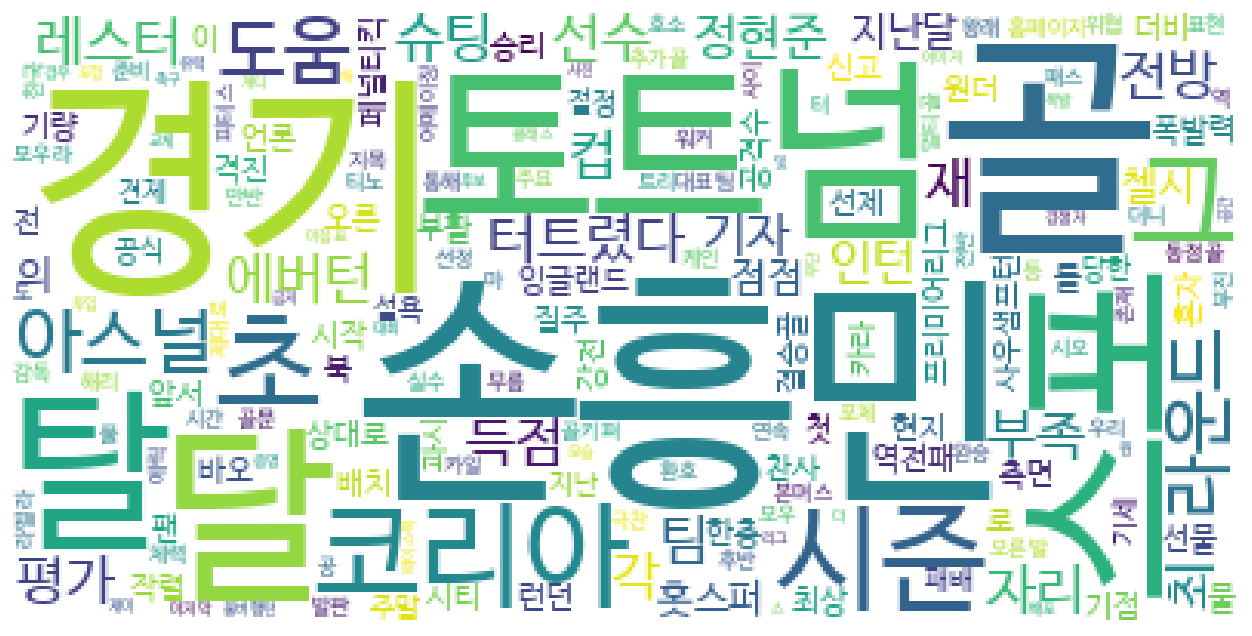

In [ ]:
# konlpy + nltk + wordcolud
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from wordcloud import WordCloud  # 단점 : 글꼴을 지원하지 않음
import matplotlib.pyplot as plt

res = requests.get('https://sports.v.daum.net/v/20181227140914322')
soup = BeautifulSoup(res.content, 'html.parser')  # html tree로 구성
body = soup.select('.article_view')[0]  # css3인 경우 
text = " ".join(p.get_text() for p in body.find_all('p'))  # p tag를 발견
t = Twitter()
tokens_ko = t.nouns(text)  # 명사만 탐색
ko = nltk.Text(tokens_ko, name = '스포츠')  # 탐색된 명사를 넣음
print(ko.vocab().most_common(10))  # 빈도가 가장 많은 명사 10개를 출력
data = ko.vocab().most_common(500)  # 500개
# 불용어를 별도로 지정 (제외)
stopwords = ['점점', '지난', '측면', '기세', '북', '격진', '더비', '시오', '포체',
             '기점', '의', '이', '당한', '로', '오른', '사이', '탈']
tokens = [each_word for each_word in data if each_word not in stopwords]
tmp_data = dict(tokens)  # 도수를 카운트 / dict형
wordcloud = WordCloud(font_path = fontpath, relative_scaling = 0.1,  # 도수 크기의 0.1만 반영
                      background_color = 'white',).generate_from_frequencies(tmp_data) 
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# konlpy + TruncatedSVD == topic analysis

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from konlpy.tag import Komoran
documents = [
    '안녕하세요. 저는 자연어 처리에 관심이 있습니다.',
    '컴퓨터공학과 학생입니다. 기계 학습에 관심이 많아요.',
    '한국어 자연어 처리는 어려운 부분이 많습니다.',
    'konlpy를 사용하면 한국어 처리가 쉬워집니다.'
]
komoran=Komoran()
corpus = [' '.join(komoran.morphs(doc)) for doc in documents]
komoran = Komoran()
corpus = [' '.join(komoran.morphs(doc)) for doc in documents]
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
svd = TruncatedSVD(n_components=2)
lsi = svd.fit_transform(tfidf)

print('LSI 결과:')
for i, doc in enumerate(documents):
  print(f'문서{i+1}: {doc}')
  print(f'LSI 벡터: {lsi[i]}')
  print()

LSI 결과:
문서1: 안녕하세요. 저는 자연어 처리에 관심이 있습니다.
LSI 벡터: [ 0.75832965 -0.16919962]

문서2: 컴퓨터공학과 학생입니다. 기계 학습에 관심이 많아요.
LSI 벡터: [0.29306303 0.88743619]

문서3: 한국어 자연어 처리는 어려운 부분이 많습니다.
LSI 벡터: [ 0.79565256 -0.35328125]

문서4: konlpy를 사용하면 한국어 처리가 쉬워집니다.
LSI 벡터: [0.55560114 0.26876021]



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/winemag.csv', index_col = 0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df.shape  (129971, 13)

(129971, 13)

In [ ]:
df.columns  # 비지도학습 => 데이터 전처리, 시각화, 데이터 요약, 군집 분석 -> 지도학습으로 변환

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [ ]:
df.country

0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [ ]:
country = df.groupby('country')
country.describe().head()  # 숫자만 설명 

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

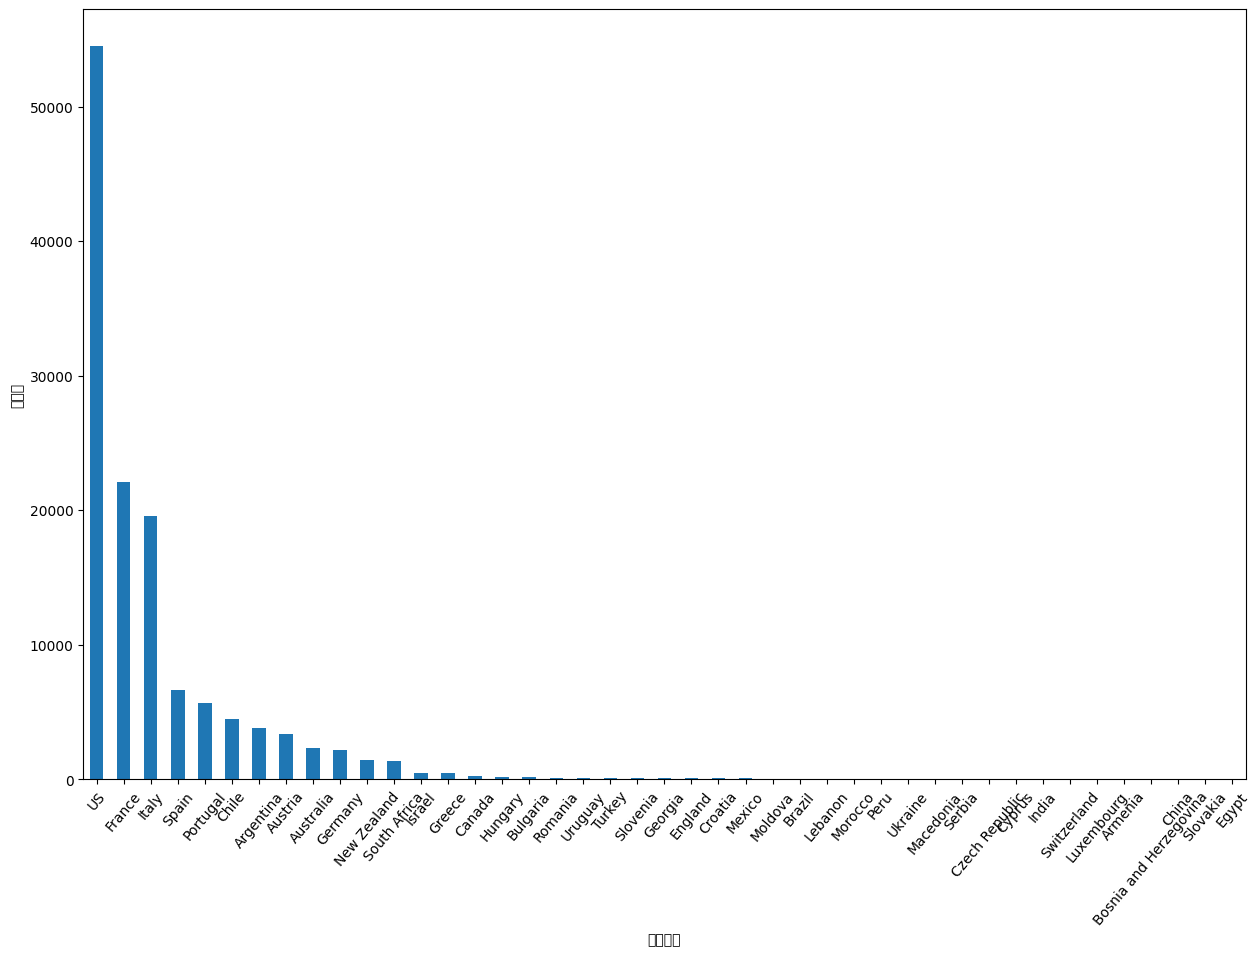

In [ ]:
# 문제
# 나라별 와인의 개수(wine)를 시각화
plt.figure(figsize=(15, 10))
country.size().sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 50)
plt.xlabel("생산국가")
plt.ylabel("와인수")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

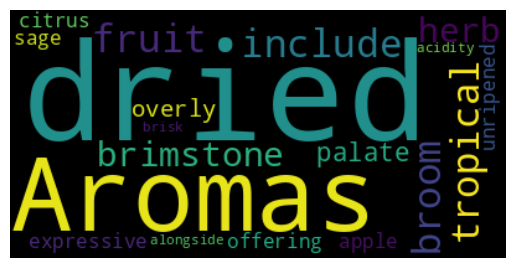

In [ ]:
# 문제
# df.description[0] -> WordCloud로 시각화하기
text = df.description[0]
wordcloud = WordCloud(max_words=20).generate_from_text(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
wordcloud.to_file("winw_reveiw1.png")

In [ ]:
# 문제
# description에 있는 모든 단어숫자를 카운트
# 이후 워드클라우드로 시각화하기

text = ' '.join(review for review in df.description)
print("{}의 단어로 이루어진 와인평.".format(len(text)))

31661073의 단어로 이루어진 와인평.


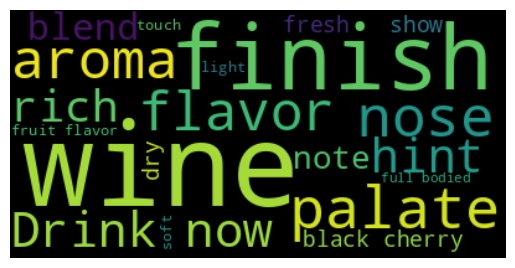

In [ ]:
wordcloud = WordCloud(max_words=20).generate_from_text(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 문제
# description 중 개수를 카운트하여, 50개 이하의 것들은 제외하고
# 나머지 데이터를 별도의 데이터프레임으로 담기
df['len'] = df['description'].apply(lambda x:len(x.split(' ')))
winedf = df[df['len'] >= 50]
winedf.shape

(24459, 14)

In [ ]:
# spacy 패키지
# 고속으로 동작 : GPU도 사용이 가능하다.

In [ ]:
!pip install spacy
!spacy download en_core_web_sm
!spacy download ko_core_news_sm

In [ ]:
import spacy
from spacy.lang.ko.examples import sentences
documents = [
    '안녕하세요. 저는 자연어 처리에 관심이 있습니다.',
    '컴퓨터공학과 학생입니다. 기계 학습에 관심이 많아요.',
    '한국어 자연어 처리는 어려운 부분이 많습니다.',
    'konlpy를 사용하면 한국어 처리가 쉬워집니다.'
]
nlp = spacy.load("ko_core_news_sm")
doc = nlp(documents[0])
print(doc.text)

안녕하세요. 저는 자연어 처리에 관심이 있습니다.


In [ ]:
for token in doc:
  print(token.text,
        token.lemma_,  # 표제어
        token.pos_,    # 단어의 품사
        token.tag_,    # 자세한 품사
        token.is_stop, # 불용어 여부
        token.dep_,    # 의존 관계
        token.head)    # 지배소

안녕하세요 안녕하+세+요 VERB ncn+jp+ef False ROOT 안녕하세요
. . PUNCT sf False punct 안녕하세요
저는 저+는 PRON npp+jxt False dislocated 있습니다
자연어 자연+어 NOUN ncn+jcs False nsubj 처리에
처리에 처리에 NOUN ncn+jcm False nmod 관심이
관심이 관심+이 NOUN ncpa+jcs False nsubj 있습니다
있습니다 있+습니다 ADJ paa+ef False ROOT 있습니다
. . PUNCT sf False punct 있습니다


In [ ]:
import spacy as sp
sp.prefer_gpu()

False

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
import re
# dictionary, stopwords, 데이터 타입 판별. 구둣점
def clean_text(doc):
  doc = nlp(doc)
  tokens = []
  exclusion_list = ['nan']  # 특별하게 제외해야 할 정보(도메인에서 고려대상이 아닌 데이터)
  for token in doc:
    if token.is_stop or token.is_punct or token.text.isnumeric() or (token.text.isalnum() == False) or token.text in exclusion_list:  # 데이터 전처리 과정
        continue
    token = str(token.lemma_.lower().strip())
    tokens.append(token)
  return " ".join(tokens)  # 정제된 텍스트

winedf['cleaned_description'] = winedf.apply(lambda row: clean_text(row['description']), axis = 1)
winedf.reset_index(inplace = True)
winedf

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,len,cleaned_description
0,19,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont,55,red fruit aroma pervade nose cigar box menthol...
1,29,US,Clarksburg is becoming a haven for Chenin Blan...,NaN,86,16.0,California,Clarksburg,Central Valley,Virginie Boone,@vboone,Clarksburg Wine Company 2010 Chenin Blanc (Cla...,Chenin Blanc,Clarksburg Wine Company,50,clarksburg haven chenin blanc california bottl...
2,36,Chile,"White flower, lychee and apple aromas carry th...",Estate,86,15.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Estampa 2011 Estate Viognier-Chardonnay (Colch...,Viognier-Chardonnay,Estampa,51,white flower lychee apple aroma carry mellow b...
3,48,US,This bottling resembles the New Zealand paradi...,NaN,86,16.0,Virginia,Monticello,NaN,NaN,NaN,Trump 2011 Sauvignon Blanc (Monticello),Sauvignon Blanc,Trump,50,bottle resemble new zealand paradigm sauvignon...
4,51,Chile,This is much different than Casa Silva's 2009 ...,Gran Reserva,85,22.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Casa Silva 2008 Gran Reserva Petit Verdot (Col...,Petit Verdot,Casa Silva,55,different casa silva petit verdot taste flight...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24454,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,66,hail popular vineyard varietal central coast w...
24455,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,50,bone use oak wine spend month enjoy cradle eff...
24456,129957,Spain,Lightly baked berry aromas vie for attention w...,Crianza,90,17.0,Northern Spain,Rioja,NaN,Michael Schachner,@wineschach,Viñedos Real Rubio 2010 Crianza (Rioja),Tempranillo Blend,Viñedos Real Rubio,62,lightly bake berry aromas vie attention leathe...
24457,129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim,52,granite soil brand grand cru vineyard produce ...


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
winedf['title_id'] = le.fit_transform(winedf['title'])  # title열 값을 숫자로 변환 (LabelEncoder)
contentdf = winedf[['title_id', 'title', 'description', 'cleaned_description']]  # 새로운 데이터프레임
contentdf = contentdf.set_index('title_id')  # 'title_id를 인덱스로 설정
contentdf.reset_index(inplace = True)
contentdf

,title_id,title,description,cleaned_description
0,16891,Quiévremont 2012 Meritage (Virginia),"Red fruit aromas pervade on the nose, with cig...",red fruit aroma pervade nose cigar box menthol...
1,5092,Clarksburg Wine Company 2010 Chenin Blanc (Cla...,Clarksburg is becoming a haven for Chenin Blan...,clarksburg haven chenin blanc california bottl...
2,8085,Estampa 2011 Estate Viognier-Chardonnay (Colch...,"White flower, lychee and apple aromas carry th...",white flower lychee apple aroma carry mellow b...
3,20935,Trump 2011 Sauvignon Blanc (Monticello),This bottling resembles the New Zealand paradi...,bottle resemble new zealand paradigm sauvignon...
4,3469,Casa Silva 2008 Gran Reserva Petit Verdot (Col...,This is much different than Casa Silva's 2009 ...,different casa silva petit verdot taste flight...
...,...,...,...,...
24454,1972,Birichino 2013 Jurassic Park Vineyard Old Vine...,Hailing from one of the more popular vineyards...,hail popular vineyard varietal central coast w...
24455,8661,Flora Springs 2013 Barrel Fermented Chardonnay...,There's no bones about the use of oak in this ...,bone use oak wine spend month enjoy cradle eff...
24456,21829,Viñedos Real Rubio 2010 Crianza (Rioja),Lightly baked berry aromas vie for attention w...,lightly bake berry aromas vie attention leathe...
24457,3768,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,The granite soil of the Brand Grand Cru vineya...,granite soil brand grand cru vineyard produce ...
